<a href="https://colab.research.google.com/github/rahiakela/opencv-projects-and-guide/blob/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/2_detecting_facial_landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detecting facial landmarks

In computer vision, the localization of the fiducial facial key points (also called facial landmarks) is usually a key step in a lot of facial analysis methods and algorithms. Facial expression recognition, head pose estimation algorithms, and drowsiness detection systems are only a few examples, relying heavily on the facial shape information provided by the detection of facial landmarks.

A facial landmark detection algorithm aims to automatically identify the locations of the facial landmark points in images or videos. More specifically, those key points are either the dominant points that describe the unique location of a facial component (for example, corners of mouth or eyes) or an interpolated point that connects those dominant points around the facial components and facial contour. 

Formally, given a facial image denoted as I, a landmark detection algorithm detects the locations of D landmarks $x = {x_1, y_1, x_2, y_2, ..., x_D, y_D}$, where $x$ and $y$ represent the image coordinates of the facial landmarks. 

In this notebook, we are going to see how to detect facial landmarks using both OpenCV, dlib and face_recognition.

## Setup

In [ ]:
%%shell

pip install dlib
pip install face_recognition
pip install cvlib

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import dlib
import face_recognition
import cvlib as cv

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/face_test.png
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalface_alt2.xml
wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/11-face-detection-tracking-and-recognition/haarcascade_frontalface_default.xml
wget https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/raw/master/Chapter11/01-chapter-content/facial_landmarks/shape_predictor_5_face_landmarks.dat
wget https://github.com/PacktPublishing/Mastering-OpenCV-4-with-Python/raw/master/Chapter11/01-chapter-content/facial_landmarks/shape_predictor_68_face_landmarks.dat

## Detecting facial landmarks with OpenCV

The OpenCV facial landmark API is called [Facemark](https://docs.opencv.org/4.0.1/db/dd8/classcv_1_1face_1_1Facemark.html).It has three different implementations of landmark detection based on three different papers:

- **FacemarkLBF**
- **FacemarkKamezi**
- **FacemarkAAM**



In [3]:
# Load image
image = cv2.imread("face_test.png")

# Load cascade classifiers
cas_alt2 = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

# Find faces
faces = cas_alt2.detectMultiScale(image, 1.5, 5)

print("faces", faces)

faces [[110 157 228 228]
 [ 57 114 342 342]]


In [ ]:
# At this point, we create landmark detectors and test them
print("testing LBF")

facemark = cv2.face.createFacemarkLBF()
facemark.loadModel("lbfmodel.yaml")
ok, landmarks = facemark.fit(image, faces)
print ("landmarks LBF", ok, landmarks)

In [ ]:
print("testing AAM")
facemark = cv2.face.createFacemarkAAM()
facemark .loadModel("aam.xml")
ok, landmarks = facemark.fit(image , faces)
print ("landmarks AAM", ok, landmarks)

In [ ]:
print("testing Kazemi")
facemark = cv2.face.createFacemarkKazemi()
facemark.loadModel("face_landmark_model.dat")
ok, landmarks = facemark.fit(image , faces)
print ("landmarks Kazemi", ok, landmarks)

## Detecting facial landmarks with dlib

Another option is to use the dlib library to detect facial landmarks. More
specifically, we used the images taken from the webcam to perform face detection
using dlib frontal face detection. We also offer the possibility of taking the image from a test image.

In [2]:
# Define what landmarks you want:
JAWLINE_POINTS = list(range(0, 17))
RIGHT_EYEBROW_POINTS = list(range(17, 22))
LEFT_EYEBROW_POINTS = list(range(22, 27))
NOSE_BRIDGE_POINTS = list(range(27, 31))
LOWER_NOSE_POINTS = list(range(31, 36))
RIGHT_EYE_POINTS = list(range(36, 42))
LEFT_EYE_POINTS = list(range(42, 48))
MOUTH_OUTLINE_POINTS = list(range(48, 61))
MOUTH_INNER_POINTS = list(range(61, 68))
ALL_POINTS = list(range(0, 68))

In [3]:
def draw_shape_lines_all(np_shape, image):
    """Draws the shape using lines to connect between different parts of the face(e.g. nose, eyes, ...)"""

    draw_shape_lines_range(np_shape, image, JAWLINE_POINTS)
    draw_shape_lines_range(np_shape, image, RIGHT_EYEBROW_POINTS)
    draw_shape_lines_range(np_shape, image, LEFT_EYEBROW_POINTS)
    draw_shape_lines_range(np_shape, image, NOSE_BRIDGE_POINTS)
    draw_shape_lines_range(np_shape, image, LOWER_NOSE_POINTS)
    draw_shape_lines_range(np_shape, image, RIGHT_EYE_POINTS, True)
    draw_shape_lines_range(np_shape, image, LEFT_EYE_POINTS, True)
    draw_shape_lines_range(np_shape, image, MOUTH_OUTLINE_POINTS, True)
    draw_shape_lines_range(np_shape, image, MOUTH_INNER_POINTS, True)

In [4]:
def draw_shape_lines_range(np_shape, image, range_points, is_closed=False):
    """Draws the shape using lines to connect the different points"""

    np_shape_display = np_shape[range_points]
    points = np.array(np_shape_display, dtype=np.int32)
    cv2.polylines(image, [points], is_closed, (255, 255, 0), thickness=1, lineType=cv2.LINE_8)

In [5]:
def draw_shape_points_pos_range(np_shape, image, points):
    """Draws the shape using points and position for every landmark filtering by points parameter"""

    np_shape_display = np_shape[points]
    draw_shape_points_pos(np_shape_display, image)

In [6]:
def draw_shape_points_pos(np_shape, image):
    """Draws the shape using points and position for every landmark"""

    for idx, (x, y) in enumerate(np_shape):
        # Draw the positions for every detected landmark:
        cv2.putText(image, str(idx + 1), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255))

        # Draw a point on every landmark position:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

In [7]:
def draw_shape_points_range(np_shape, image, points):
    """Draws the shape using points for every landmark filtering by points parameter"""

    np_shape_display = np_shape[points]
    draw_shape_points(np_shape_display, image)

In [8]:
def draw_shape_points(np_shape, image):
    """Draws the shape using points for every landmark"""

    # Draw a point on every landmark position:
    for (x, y) in np_shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

The following step is to transform shape into a numpy array. In this sense, shape is a dlib full_object_detection object, which represents the location of an object in an image with the positions of all the parts.

In [9]:
def shape_to_np(dlib_shape, dtype="int"):
    """Converts dlib shape object to numpy array"""

    # Initialize the list of (x,y) coordinates
    coordinates = np.zeros((dlib_shape.num_parts, 2), dtype=dtype)

    # Loop over all facial landmarks and convert them to a tuple with (x,y) coordinates:
    for i in range(0, dlib_shape.num_parts):
        coordinates[i] = (dlib_shape.part(i).x, dlib_shape.part(i).y)

    # Return the list of (x,y) coordinates:
    return coordinates

The next step is to get the shape using the shape predictor.

In [10]:
# Name of the two shape predictors
p = "shape_predictor_68_face_landmarks.dat"
# p = "shape_predictor_5_face_landmarks.dat"

# Initialize frontal face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [11]:
from google.colab.patches import cv2_imshow

**Draw all lines connecting the different face parts**

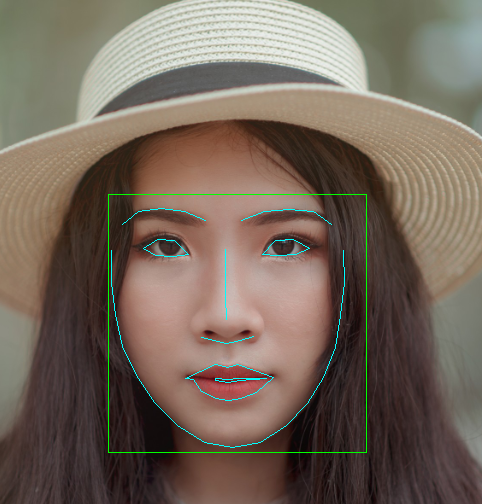

In [13]:
# You can use a test image for debugging purposes
test_face = cv2.imread("face_test.png")

# Just for debugging purposes
frame = test_face.copy()

# Convert frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
rects = detector(gray, 0)

# For each detected face, find the landmark
for (i, rect) in enumerate(rects):
  # Draw a box around the face
  cv2.rectangle(frame, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 1)

  # Get the shape using the predictor
  shape = predictor(gray, rect)

  # Convert the shape to numpy array
  shape = shape_to_np(shape)

  # Draw all lines connecting the different face parts
  draw_shape_lines_all(shape, frame)

# Display the resulting frame
cv2_imshow(frame)

**Draw jaw line**

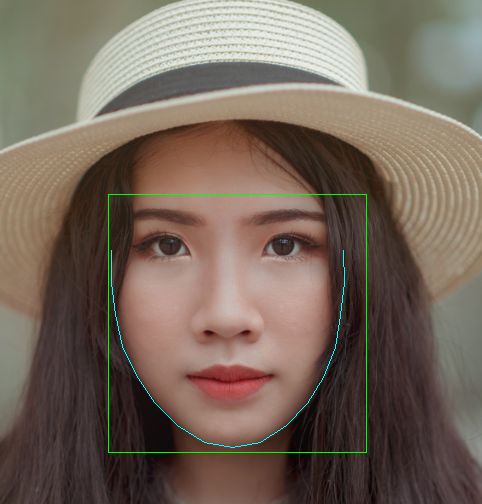

In [14]:
# You can use a test image for debugging purposes
test_face = cv2.imread("face_test.png")

# Just for debugging purposes
frame = test_face.copy()

# Convert frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
rects = detector(gray, 0)

# For each detected face, find the landmark
for (i, rect) in enumerate(rects):
  # Draw a box around the face
  cv2.rectangle(frame, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 1)

  # Get the shape using the predictor
  shape = predictor(gray, rect)

  # Convert the shape to numpy array
  shape = shape_to_np(shape)

  # Draw jaw line
  draw_shape_lines_range(shape, frame, JAWLINE_POINTS)

# Display the resulting frame
cv2_imshow(frame)

**Draw all points and their position**

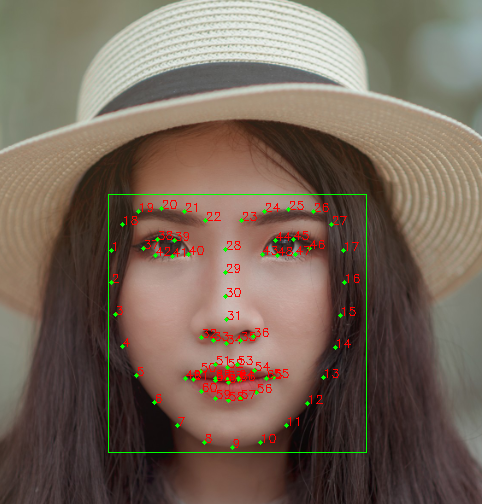

In [15]:
# You can use a test image for debugging purposes
test_face = cv2.imread("face_test.png")

# Just for debugging purposes
frame = test_face.copy()

# Convert frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
rects = detector(gray, 0)

# For each detected face, find the landmark
for (i, rect) in enumerate(rects):
  # Draw a box around the face
  cv2.rectangle(frame, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 1)

  # Get the shape using the predictor
  shape = predictor(gray, rect)

  # Convert the shape to numpy array
  shape = shape_to_np(shape)

  # Draw all points and their position
  draw_shape_points_pos(shape, frame)

# Display the resulting frame
cv2_imshow(frame)

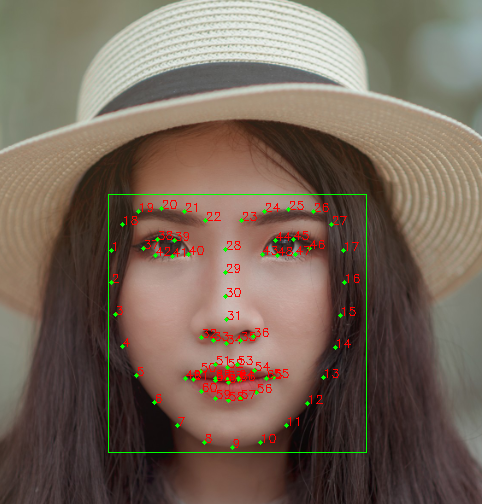

In [16]:
# You can use a test image for debugging purposes
test_face = cv2.imread("face_test.png")

# Just for debugging purposes
frame = test_face.copy()

# Convert frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
rects = detector(gray, 0)

# For each detected face, find the landmark
for (i, rect) in enumerate(rects):
  # Draw a box around the face
  cv2.rectangle(frame, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 1)

  # Get the shape using the predictor
  shape = predictor(gray, rect)

  # Convert the shape to numpy array
  shape = shape_to_np(shape)

  # You can also use
  draw_shape_points_pos_range(shape, frame, ALL_POINTS)

# Display the resulting frame
cv2_imshow(frame)

Using a webcam to capture images for processing on the runtime.

https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi

In [17]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


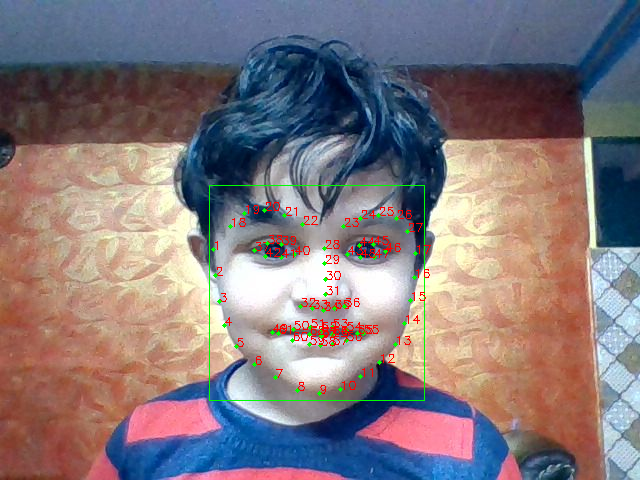

In [22]:
from IPython.display import Image

# take pic from webcam
filename = take_photo()
print('Saved to {}'.format(filename))

# load saved image
test_face = cv2.imread(filename)
frame = test_face.copy()

# Convert frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
rects = detector(gray, 0)

# For each detected face, find the landmark
for (i, rect) in enumerate(rects):
  # Draw a box around the face
  cv2.rectangle(frame, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (0, 255, 0), 1)

  # Get the shape using the predictor
  shape = predictor(gray, rect)

  # Convert the shape to numpy array
  shape = shape_to_np(shape)

  # Draw all lines connecting the different face parts
  # draw_shape_lines_all(shape, frame)

  # Draw all points and their position
  draw_shape_points_pos(shape, frame)

# Display the resulting frame
cv2_imshow(frame)

## Detecting facial landmarks with face_recognition